In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# 1 - La fonction g qui renvoi cos(x) - x^3
def fonction_g(x):
    return np.cos(x) - x**3

In [20]:
# 2 - La courbe de la fonction g
def afficher_g(debut, fin):
    # Générer les valeurs
    valeurs = np.linspace(debut, fin, 50)
    y = fonction_g(valeurs)
    # Faire le plot
    plt.plot(valeurs, y)
    # Afficher : On va remarquer qu'elle n'est ni convexe ni concave entre
    # -100 et 100, et convexe entre 0 et 2
    plt.show()

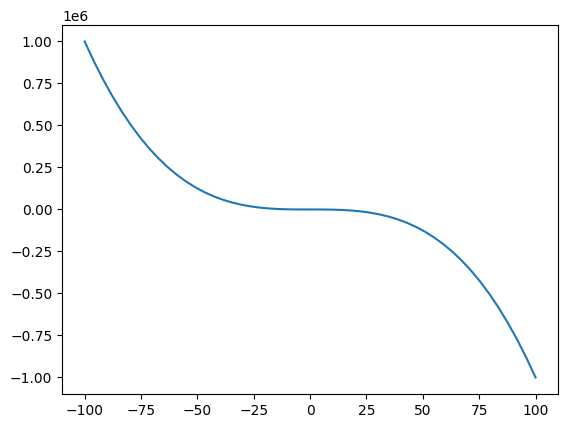

In [21]:
# Afficher g entre -100 et 100
afficher_g(-100,100)

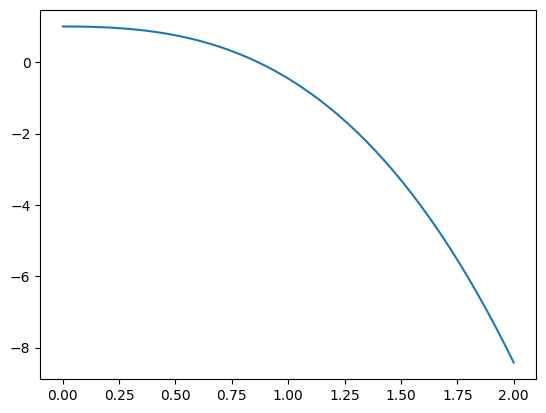

In [22]:
# Afficher g entre 0 et 2
afficher_g(0, 2)

In [23]:
# 3 - La fonction gPrime(x) qui renvoi la dérivée de g en x
def gPrime(x):
    return -np.sin(x) - 3*x**2

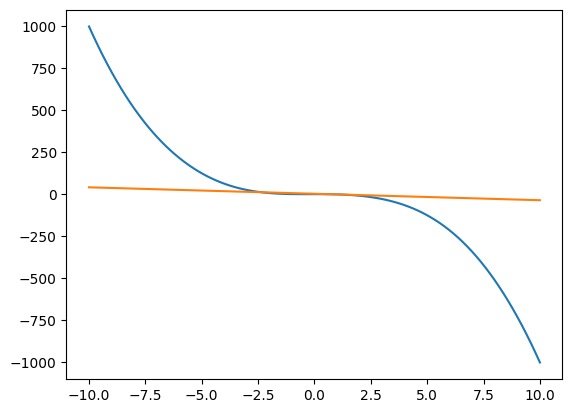

In [24]:
# 4 - Tracer la tangente à la courbe en x0 = 1 : Application dans le main
def tangente_g(x0):
    # Tracer g en x0
    valeurs = np.linspace(-10, 10, 100)
    fonc_g = fonction_g(valeurs)
    # Faire le plot
    plt.plot(valeurs, fonc_g)
    # Générer les valeurs
    x = np.linspace(-10, 10, 100)
    y = gPrime(x0) * (x - x0) + fonction_g(x0)
    # Faire le plot
    plt.plot(x, y)
    # Afficher
    plt.show()
# 4 - Tracer la tengente de g en x0 = 1
tangente_g(1)

In [25]:
# 5 - La fonction NewtonUnidirectionnel(g, gPrime, x0, eps, maxIter)
def NewtonUnidirectionnel(g, gPrime, x0, eps, maxIter):
    k = 0
    X = [x0]
    while k < maxIter:
        # Vérifier si gPrime(X[k]) est proche de zéro pour éviter la division par zéro
        if abs(gPrime(X[k])) < 1e-10:
            return f"Erreur : gPrime({X[k]}) est proche de zéro, division par zéro !"

        # Calculer la prochaine approximation
        X_next = X[k] - (g(X[k]) / gPrime(X[k]))
        X.append(X_next)

        # Vérifier la condition de convergence sur g(X)
        if abs(g(X_next)) < eps:
            return f"Solution vérifiant g(x) = 0 est x = {X_next} après {k + 1} itérations"

        k += 1

    return "Erreur : Maximum d'itérations atteint, aucune solution trouvée !"

In [26]:
# 6 - À partir de x0 = 1, on cherche x vérifiant cos(x) = x^3
print(NewtonUnidirectionnel(fonction_g, gPrime, 1, 1e-5, 2e10))

Solution vérifiant g(x) = 0 est x = 0.865474075952977 après 3 itérations


In [27]:
# 7 - Non, on ne peut pas trouver un point x0 tel que la méthode de Newton ne converge pas vers une solution

In [28]:
# 8 - Ecrire une fonction python gPrimeApproximee(x,h) qui renvoie la d´eriv´ee
# de g en x en utilisant une approximation de la dérivée
def gPrimeApproximee(x, h):
    return (fonction_g(x + h) - fonction_g(x)) / h

In [29]:
# 9 - On va tester NewtonUnidirectionnel avec gPrimeApproximee
def NewtonUnidirectionnelAvechEnParametres(g, x0, eps, maxIter, h):
    k = 0
    X = [x0]

    while k < maxIter:
        # Calculer la dérivée approximative en utilisant gPrimeApproximee
        gPrime_approx = gPrimeApproximee(X[k], h)

        # Vérifier si la dérivée est proche de zéro pour éviter la division par zéro
        if abs(gPrime_approx) < 1e-10:
            return f"Erreur : gPrimeApproximee({X[k]}) est proche de zéro, division par zéro !"

        # Calculer la prochaine approximation
        X_next = X[k] - (g(X[k]) / gPrime_approx)
        X.append(X_next)

        # Vérifier la condition de convergence sur g(X)
        if abs(g(X_next)) < eps:
            return f"Solution vérifiant g(x) = 0 est x = {X_next} après {k + 1} itérations"

        k += 1

    return "Erreur : Maximum d'itérations atteint, aucune solution trouvée !"


In [30]:
# Tester la nouvelle fonction avec gPrimeApproximee
x0 = 1
eps = 1e-5
maxIter = 2000
h = 1e-5

# À partir de x0 = 1, on cherche x vérifiant cos(x) = x^3
resultat = NewtonUnidirectionnelAvechEnParametres(fonction_g, x0, eps, maxIter, h)
print(resultat)

Solution vérifiant g(x) = 0 est x = 0.8654740780623565 après 3 itérations


In [31]:
def dichotomie(g, a, b, eps, maxIter):
    if g(a) * g(b) > 0:
        return "Erreur : g(a) et g(b) doivent avoir des signes opposés."
    k = 0
    while (b - a) / 2 > eps and k < maxIter:
        m = (a + b) / 2
        if g(m) == 0 or abs(g(m)) < eps:
            return f"Solution trouvée : x = {m}, g(x) = {g(m)}, après {k} itérations"
        if g(m) * g(b) < 0:
            a = m
        else:
            b = m
        k += 1
    return f"Solution approximative : x = {(a + b) / 2}, g(x) = {g((a + b) / 2)}, après {k} itérations"

In [32]:
def secante(g, a, b, eps, maxIter):
    if g(a) * g(b) > 0:
        return "Erreur : g(a) et g(b) doivent avoir des signes opposés."
    k = 0
    while abs(b - a) > eps and k < maxIter:
        # Calculer le point d'intersection avec l'axe des abscisses (la racine estimée)
        p = b - (g(b) * (b - a)) / (g(b) - g(a))
        # Vérifier si la solution est proche de zéro
        if abs(g(p)) < eps:
            return f"Solution trouvée : x = {p}, g(x) = {g(p)}, après {k + 1} itérations"
        # Mise à jour des bornes
        if g(p) * g(b) < 0:
            a = b
        b = p
        k += 1
    return f"Solution approximative : x = {p}, g(x) = {g(p)}, après {k} itérations"

In [33]:
import numpy as np

def minimiser_forme_quadratique(Q, c):
    """
    Trouve le minimum global de la fonction quadratique f(x) = 1/2 * x^T * Q * x + c^T * x
    en résolvant Qx = -c.
    """
    # Résoudre Qx = -c
    x_opt = np.linalg.solve(Q, -c)
    return x_opt

In [34]:
# Matrice Q et vecteur c pour le premier cas
Q1 = np.array([[2, 1, 1],
               [1, 2, 1],
               [1, 1, 2]])

c = np.array([-2, 1, 5])

# Calculer l'optimum pour le premier cas
x_opt1 = minimiser_forme_quadratique(Q1, c)
print("Optimum pour Q1 :", x_opt1)

# Matrice Q pour le deuxième cas
Q2 = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Vérifier si Q2 est définie positive
if np.linalg.det(Q2) != 0:
    # Calculer l'optimum pour le deuxième cas
    x_opt2 = minimiser_forme_quadratique(Q2, c)
    print("Optimum pour Q2 :", x_opt2)
else:
    print("La matrice Q2 n'est pas définie positive, il n'y a pas de solution unique.")


Optimum pour Q1 : [ 3.00000000e+00 -1.48029737e-16 -4.00000000e+00]
La matrice Q2 n'est pas définie positive, il n'y a pas de solution unique.
